In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./googleplaystore.csv')

In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
df.sample(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900,17M,"500,000+",Free,0,Everyone,Beauty,"August 2, 2018",6.10.1,5.0 and up
669,Find Lover,DATING,NaN,21,4.7M,"1,000+",Free,0,Mature 17+,Dating,"July 27, 2018",1.0.2,4.0.3 and up
1834,The Escapists,GAME,4.4,7412,84M,"100,000+",Paid,$4.99,Teen,Strategy,"April 26, 2018",1.1.0,2.3 and up
8961,MelifeCam-M,VIDEO_PLAYERS,3.5,81,22M,"10,000+",Free,0,Everyone,Video Players & Editors,"July 21, 2016",R1.3.21.3,4.1 and up
10260,Barcelona Wallpaper HD,PERSONALIZATION,4.5,93,5.7M,"10,000+",Free,0,Everyone,Personalization,"February 28, 2018",1.10,4.1 and up
8173,Ghost Detector,FAMILY,3.5,35337,7.4M,"5,000,000+",Free,0,Teen,Entertainment,"May 25, 2018",1.7.28,4.0 and up
1753,Love Balls,GAME,4.2,360630,40M,"50,000,000+",Free,0,Everyone,Puzzle,"July 31, 2018",1.2.7,4.1 and up
5147,Maricopa AH,MEDICAL,NaN,0,29M,100+,Free,0,Everyone,Medical,"July 16, 2018",300000.1.11,4.0.3 and up
8263,MARVEL Avengers Academy,GAME,4.2,304106,Varies with device,"10,000,000+",Free,0,Teen,Adventure,"August 6, 2018",2.8.2,4.0.3 and up
554,Just She - Top Lesbian Dating,DATING,1.9,953,19M,"100,000+",Free,0,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
df=df[df['Category']!='1.9']

In [12]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
from pandas import to_datetime
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('January ','1-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('February ','2-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('May ','3-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('April ','4-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('March ','5-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('June ','6-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('July ','7-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('August ','8-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('September ','9-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('October ','10-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('November ','11-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace('December ','12-'))
df['Last Updated']=df['Last Updated'].apply(lambda x: x.replace(', ','-'))
df['Last Updated']=to_datetime(df['Last Updated'],format="%m-%d-%Y")


In [10]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [11]:
import datetime
df['Time Span']=df['Last Updated'].apply(
    lambda x:  datetime.datetime.today()-x)
df['Time Span']=df['Time Span'].map(lambda x: x.days)

In [12]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [13]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size']=df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Price']=df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Size'] = df['Size'].apply(lambda x: float(x)) 
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
df.sort_values(by=['Price'],ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Time Span
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,2018-03-03,1.0.1,4.1 and up,422
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,472
5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,504
4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,287
5369,I am Rich,FINANCE,4.3,180,3.800,5000.0,Paid,399.99,Everyone,Finance,2018-05-22,1.0,4.2 and up,342
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance,2017-03-01,3.4,4.4 and up,789
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000.0,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,308
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40.000,0.0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,514
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,533
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,Paid,399.99,Everyone,Lifestyle,2018-05-11,1.0.0,4.4 and up,353


In [14]:
df=df.dropna()

In [15]:
df.to_csv('/Users/cenghaijiang/Desktop/Dleaned_Dataset.csv')

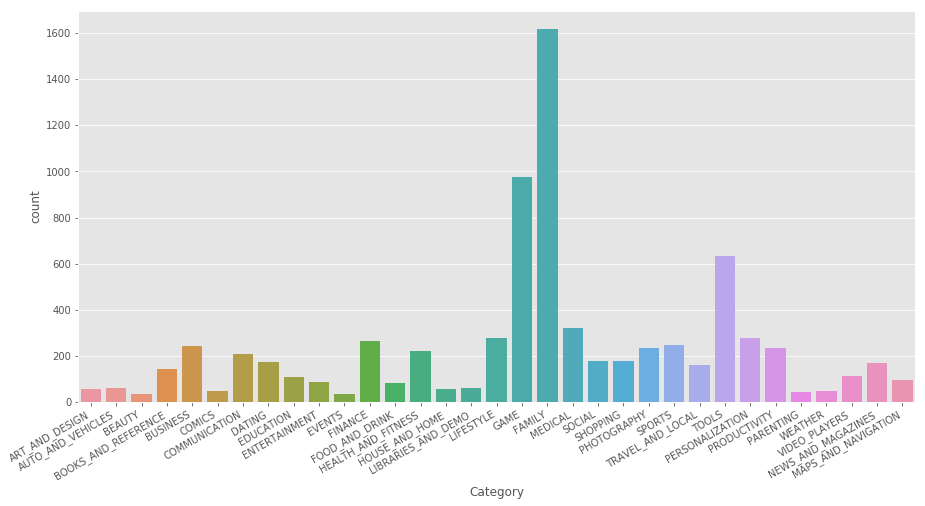

,Category,Count
11,FAMILY,1616
14,GAME,974
29,TOOLS,633
20,MEDICAL,324
18,LIFESTYLE,280


In [16]:
import seaborn as sns
fig,_ = plt.subplots()
fig.set_size_inches(15, 8)
fig.autofmt_xdate() 
countplot_category=sns.categorical.countplot(df.Category) 
plt.show(countplot_category)
table_category=df.groupby('Category').size().reset_index(name='Count').nlargest(5,'Count') 
display(table_category)

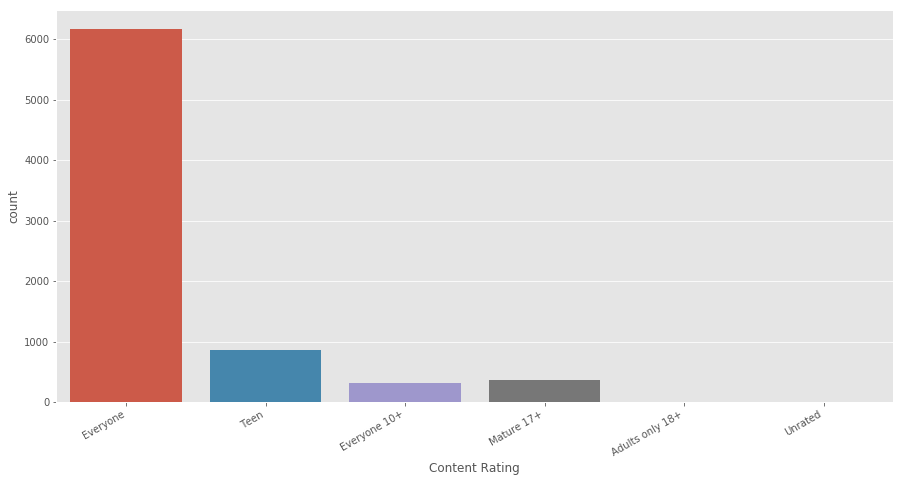

,Content Rating,Count
1,Everyone,6166
4,Teen,868
3,Mature 17+,368
2,Everyone 10+,318
0,Adults only 18+,2


In [17]:
import seaborn as sns
fig,_ = plt.subplots()
fig.set_size_inches(15, 8)
fig.autofmt_xdate() 
countplot_content_rating=sns.categorical.countplot(df['Content Rating']) 
plt.show(countplot_content_rating)
table_category=df.groupby('Content Rating').size().reset_index(name='Count').nlargest(5,'Count') 
display(table_category)

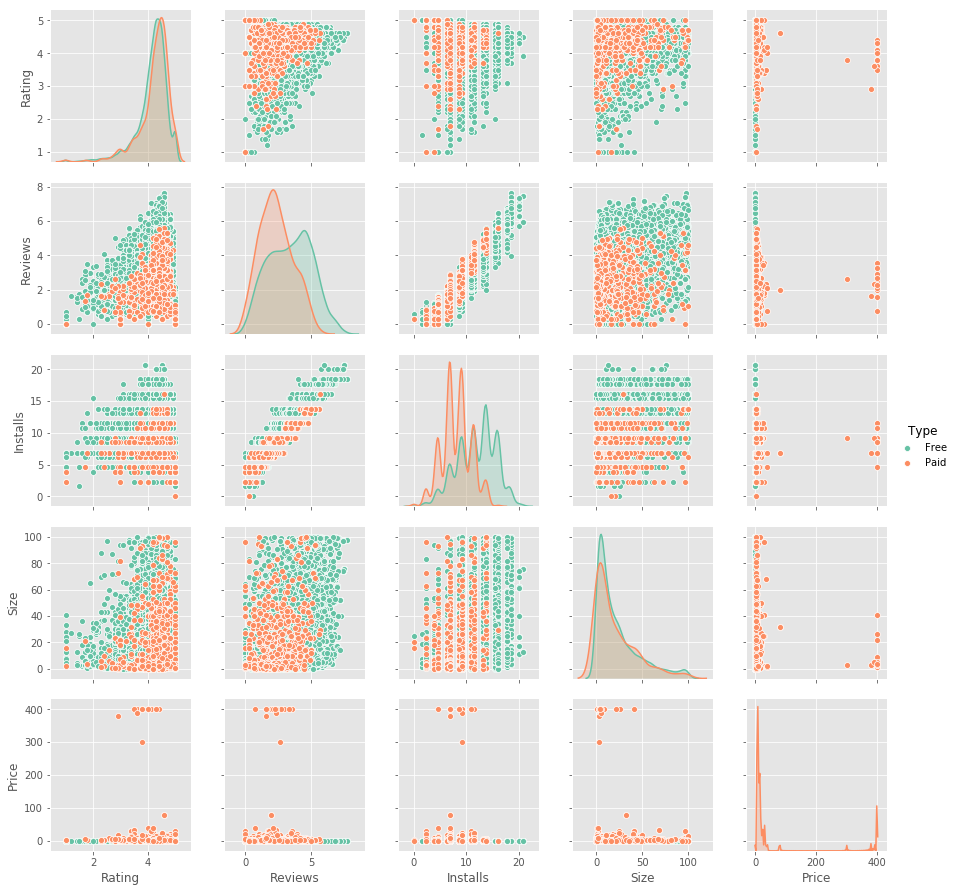

In [18]:
r = df['Rating'].dropna()
re = df['Reviews'].dropna() 
i = df['Installs'].dropna()
s = df['Size'].dropna()
t = df['Type'].dropna()
pr = df['Price']
p = sns.pairplot(pd.DataFrame(list(zip(r, np.log10(re), np.log(i), s, t, pr)),
columns=['Rating','Reviews', 'Installs', 'Size', 'Type', 'Price']), hue='Type', palette="Set2")

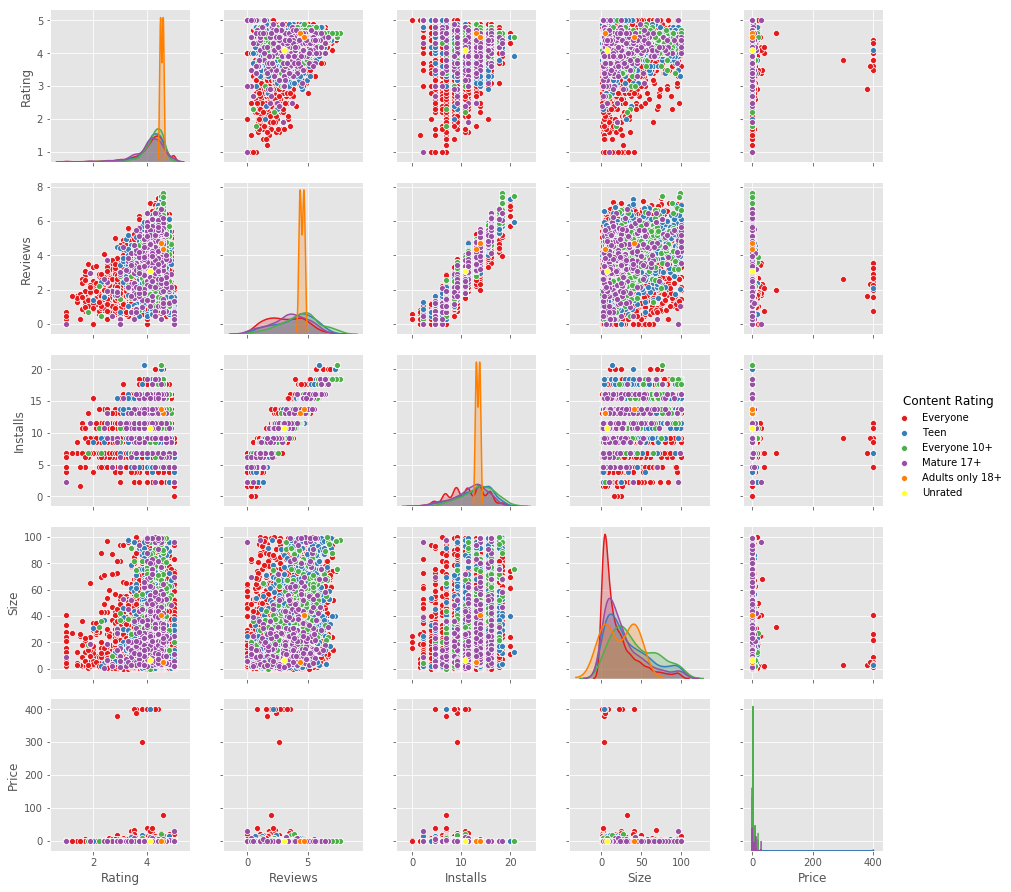

In [19]:
c=df['Content Rating'].dropna()
p2 = sns.pairplot(pd.DataFrame(list(zip(r, np.log10(re), np.log(i), s, c, pr)),
columns=['Rating','Reviews', 'Installs', 'Size', 'Content Rating', 'Price']), hue='Content Rating', palette="Set1")

In [20]:
df['Grade']=df['Rating'].apply(lambda x: 'high' if x>=4.6 else 'Medium and low')

In [21]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Time Span,Grade
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,477,Medium and low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,469,Medium and low
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,271,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,325,Medium and low
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,313,Medium and low
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000.0,Free,0.0,Everyone,Art & Design,2017-05-26,1.0,2.3 and up,703,Medium and low
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up,368,Medium and low
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,319,Medium and low
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,586,Medium and low
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,300,high


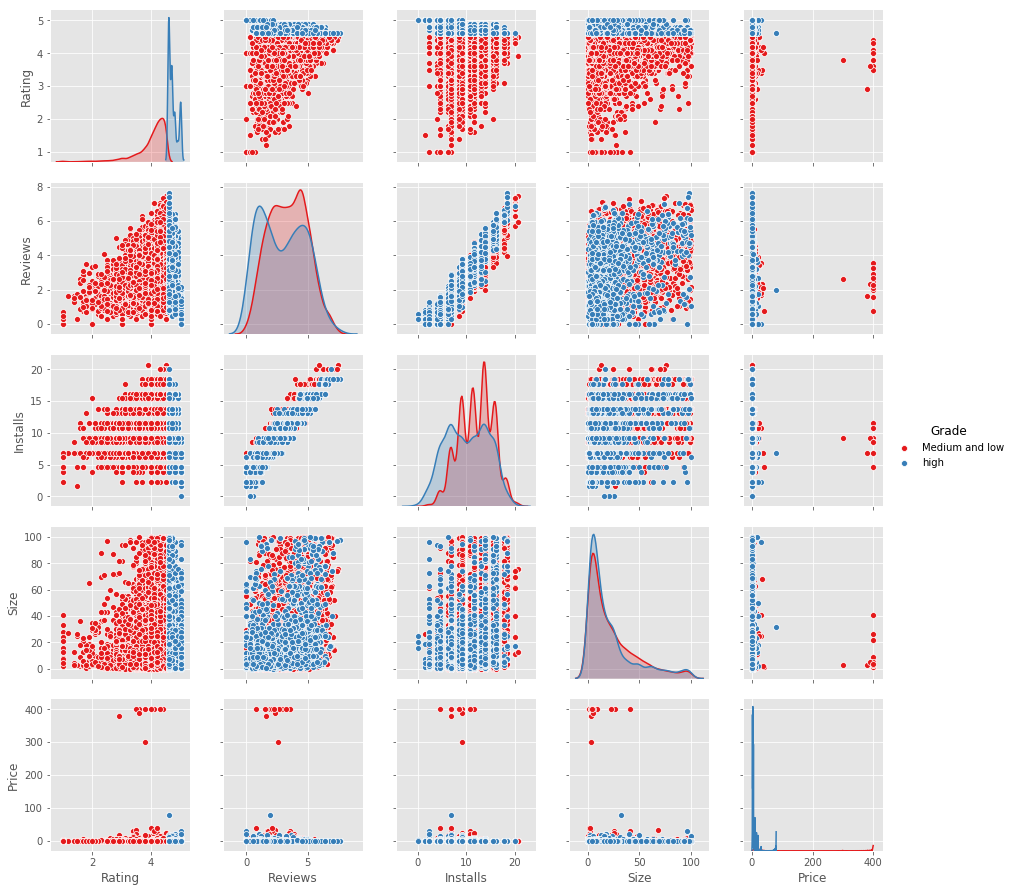

In [22]:
g=df['Grade'].dropna()
p2 = sns.pairplot(pd.DataFrame(list(zip(r, np.log10(re), np.log(i), s, g, pr)),
columns=['Rating','Reviews', 'Installs', 'Size', 'Grade', 'Price']), hue='Grade', palette="Set1")

In [23]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot 
plotly.offline.init_notebook_mode(connected=True)
numOfApps = df['Category'].value_counts().sort_values(ascending=True)
data = [go.Pie(
labels = numOfApps.index, values = numOfApps.values, hoverinfo = 'none')]
iplot(data)

In [24]:
data = [go.Histogram( x = df.Rating,
xbins = {'start': 1, 'size': 0.1, 'end' :5} )]
iplot(data)

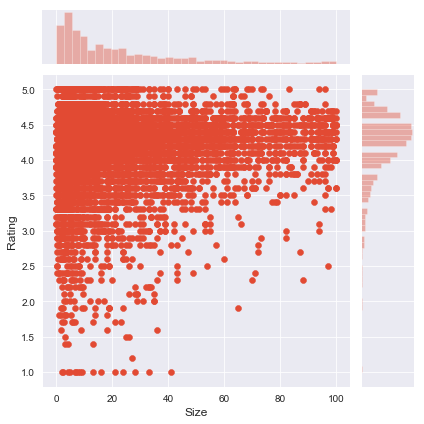

In [25]:
df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

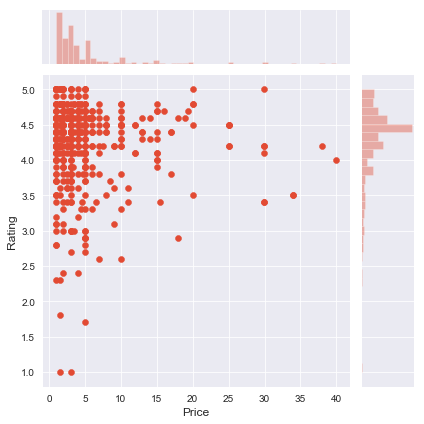

In [26]:
paid_apps = df[(df.Price>0) & (df.Price<50)]
p = sns.jointplot( "Price", "Rating", paid_apps)

Text(0.5, 1.0, 'Rating VS PriceRange,size = 20')

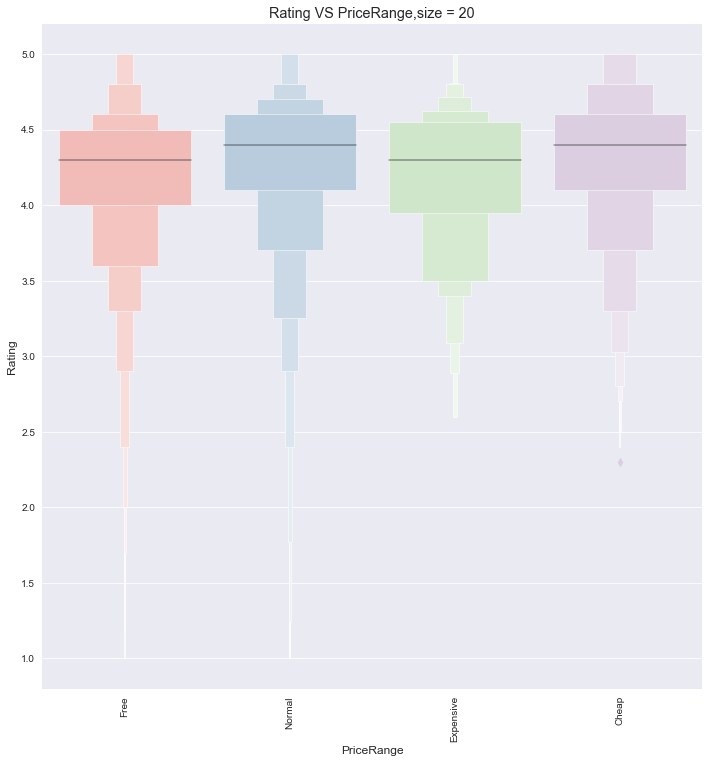

In [30]:
df.loc[ df['Price'] == 0, 'PriceRange'] = 'Free'
df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'PriceRange'] = 'Cheap'
df.loc[(df['Price'] > 0.99) & (df['Price'] <= 4.99), 'PriceRange'] = 'Normal'
df.loc[(df['Price'] > 4.99) , 'PriceRange'] = 'Expensive'
g = sns.catplot(x="PriceRange",y="Rating",data=df, kind="boxen", height = 10 ,palette = "Pastel1") 
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating") 
plt.title('Rating VS PriceRange,size = 20')

Text(0.5, 1.0, 'Rating VS RatingRange,size = 20')

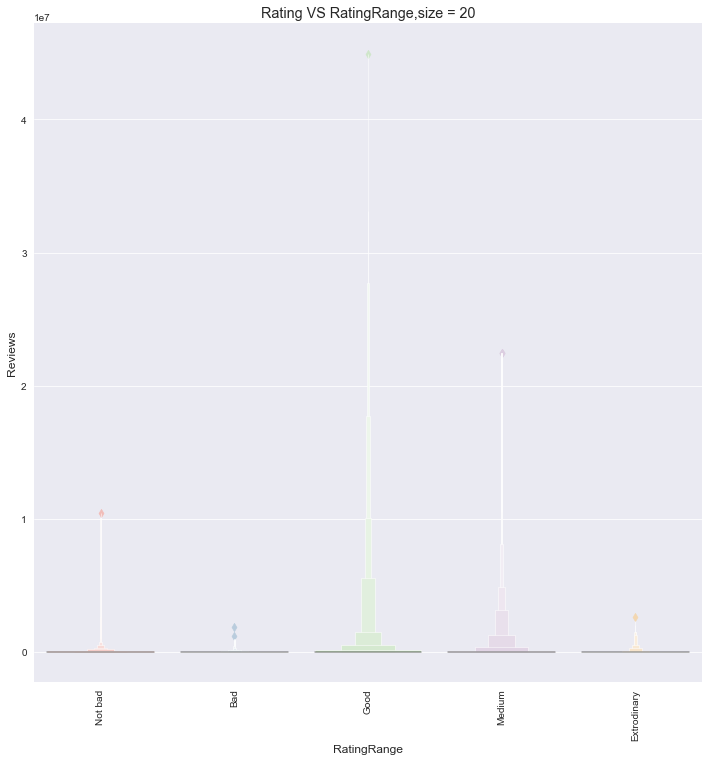

In [40]:
df.loc[ df['Rating'] >= 4.8, 'RatingRange'] = 'Extrodinary'
df.loc[(df['Rating'] >= 4.5) & (df['Rating'] < 4.8), 'RatingRange'] = 'Good'
df.loc[(df['Rating'] >=4.2) & (df['Rating'] <4.5), 'RatingRange'] = 'Medium'
df.loc[(df['Rating'] >=4) & (df['Rating'] <4.2), 'RatingRange'] = 'Not bad'
df.loc[(df['Rating'] < 4) , 'RatingRange'] = 'Bad'
g = sns.catplot(x="RatingRange",y="Reviews",data=df, kind="boxen", height = 10 ,palette = "Pastel1") 
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Reviews") 
plt.title('Rating VS RatingRange,size = 20')

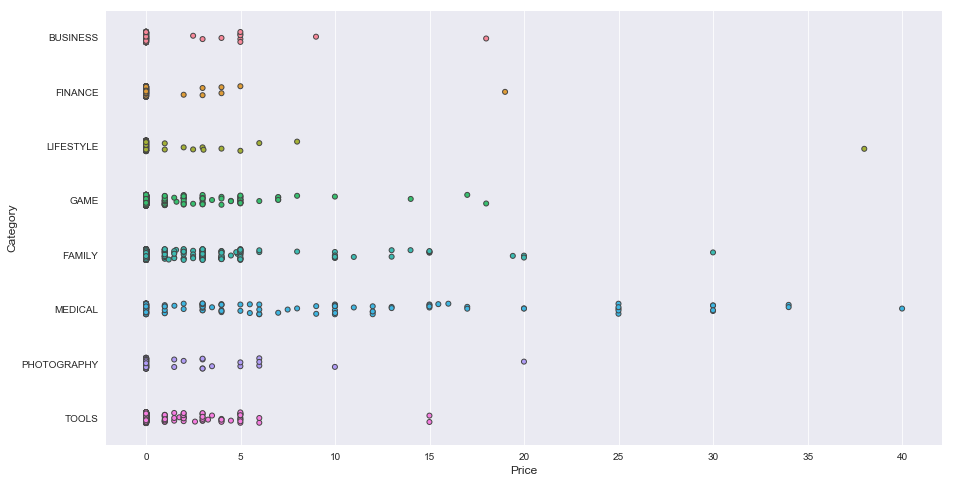

In [32]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
'LIFESTYLE','BUSINESS'])] 
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<50] 
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)

Text(0.5, 1.0, 'Rating VS Reveiws')

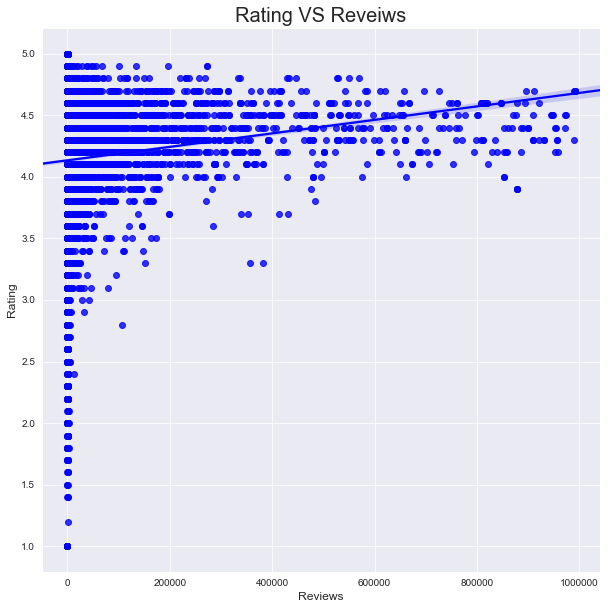

In [35]:
plt.figure(figsize = (10,10)) 
sns.regplot(x="Reviews", y="Rating", color = 'blue',data=df[df['Reviews']<1000000])
plt.title('Rating VS Reveiws',size = 20)